In [1]:
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
import datetime
end = datetime.date.today()

df = web.DataReader('GOOGL', data_source='yahoo', start='2015-01-01', end=end)

In [2]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,535.799988,527.880005,532.599976,529.549988,1324000,529.549988
2015-01-05,527.989990,517.750000,527.150024,519.460022,2059100,519.460022
2015-01-06,521.210022,505.549988,520.500000,506.640015,2722800,506.640015
2015-01-07,511.489990,503.649994,510.950012,505.149994,2345900,505.149994
2015-01-08,507.500000,495.019989,501.510010,506.910004,3652700,506.910004
...,...,...,...,...,...,...
2020-09-18,1495.199951,1431.619995,1488.300049,1451.089966,3152800,1451.089966
2020-09-21,1440.060059,1402.680054,1431.619995,1430.140015,2845400,1430.140015
2020-09-22,1463.969971,1429.500000,1450.319946,1459.819946,1697500,1459.819946


In [3]:
#get number of rows & columns
df.shape

(1443, 6)

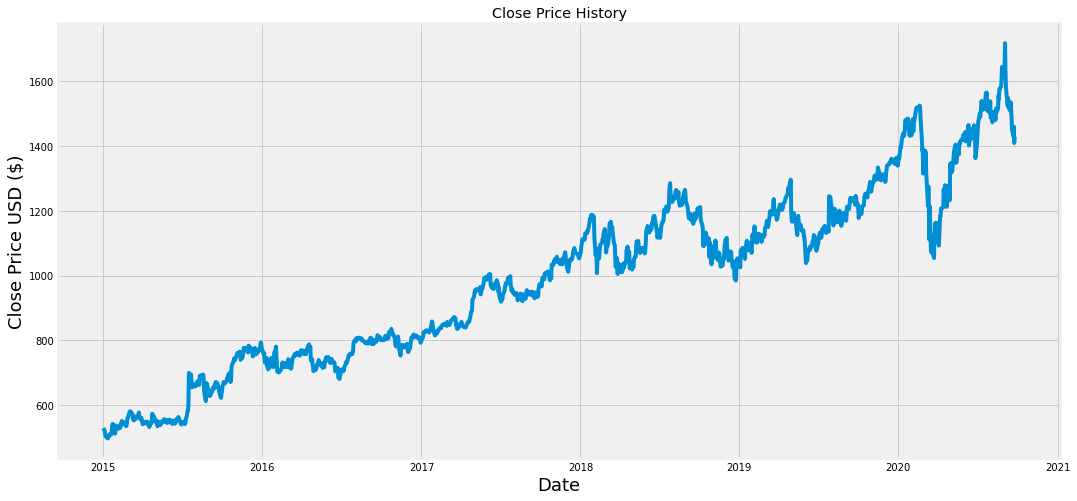

In [4]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#new df with df[close]
close_data = df.filter(['Close'])

#convert to np array
close_dataset=close_data.values

#number of rows to train model on
training_data_len = math.ceil(len(close_dataset) * .8) #pour entrainer sur 80% de notre data

training_data_len

1155

In [6]:
#data scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close_data = scaler.fit_transform(close_dataset)

scaled_close_data

array([[0.02662394],
       [0.01835571],
       [0.00785035],
       ...,
       [0.78893409],
       [0.74760926],
       [0.76380981]])

In [7]:
# create scaled training dataset
train_close_data = scaled_close_data[0:training_data_len, :]

#split the data into x_train and y_train sets
x_train = []
y_train = []

for i in range(60, len(train_close_data)):
    x_train.append(train_close_data[i-60:i, 0])
    y_train.append(train_close_data[i,0]) #60 values from index 0 to 59
    
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02662394, 0.01835571, 0.00785035, 0.00662935, 0.00807159,
       0.00299919, 0.        , 0.00388419, 0.00726852, 0.00569519,
       0.01098063, 0.01055453, 0.01911779, 0.03297468, 0.03678514,
       0.03249938, 0.01977334, 0.01259495, 0.0132505 , 0.03317954,
       0.0287955 , 0.02969688, 0.02379682, 0.02685341, 0.03017217,
       0.02640272, 0.0353183 , 0.0335483 , 0.04011211, 0.04433225,
       0.03929266, 0.03735877, 0.04047267, 0.03666221, 0.03108995,
       0.03408097, 0.04119379, 0.05099439, 0.05373137, 0.06388438,
       0.06697367, 0.06659676, 0.06913703, 0.06214715, 0.06313045,
       0.05145328, 0.04804438, 0.05253496, 0.04584006, 0.05292013,
       0.04961772, 0.05662401, 0.05458358, 0.0556325 , 0.05597666,
       0.06594936, 0.05731237, 0.05455903, 0.04956855, 0.0525104 ])]
[0.04723313680826541]

[array([0.02662394, 0.01835571, 0.00785035, 0.00662935, 0.00807159,
       0.00299919, 0.        , 0.00388419, 0.00726852, 0.00569519,
       0.01098063, 0.01055453, 0.01

In [8]:
#utiliser un réseau de neurones récurrent pour prdéire le cours de la bourse #supervised DL

In [9]:
#converting x_train and y_train into np arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.shape
#x_train.shape[0] for 1st value

(1095, 60)

In [11]:
#reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #x_train.shape == 60
x_train.shape
#y_train = np.reshape(y_train, ())

(1095, 60, 1)

In [12]:
#build the LSTM model

model = Sequential()
#50 nerons
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
#25neurons
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile th model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#training
model.fit(x_train, y_train, batch_size=1, epochs=1)

1095/1095 [==============================] - 24s 22ms/step - loss: 0.0013


In [15]:
#testing dataset creation
#scaled values array from index 1084 to 1144 creation
test_data = scaled_close_data[training_data_len - 60: , :]

#x_test and y_test data sets creation
x_test= []
y_test= close_dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    #y_test.append()

In [16]:
#converting data to np array 
x_test = np.array(x_test)

In [17]:
print(x_test.shape)
#reshaping the data #we need a 3 dimensional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(288, 60)


In [18]:
x_test.shape

(288, 60, 1)

In [19]:
#get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling the values

In [20]:
#model evalutation with the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.14307361178928

In [21]:
#plotting data 
train = close_data[:training_data_len]
valid = close_data[training_data_len:]
valid['Predictions'] = predictions

/home/jasminelabeille/anaconda3/envs/yfinance/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
valid

,Close,Predictions
Date,,
2019-08-06,1171.079956,1218.508423
2019-08-07,1175.910034,1213.934570
2019-08-08,1206.189941,1209.692017
2019-08-09,1188.900024,1209.331421
2019-08-12,1174.500000,1208.901245
...,...,...
2020-09-18,1451.089966,1530.638306
2020-09-21,1430.140015,1518.227051
2020-09-22,1459.819946,1503.672485


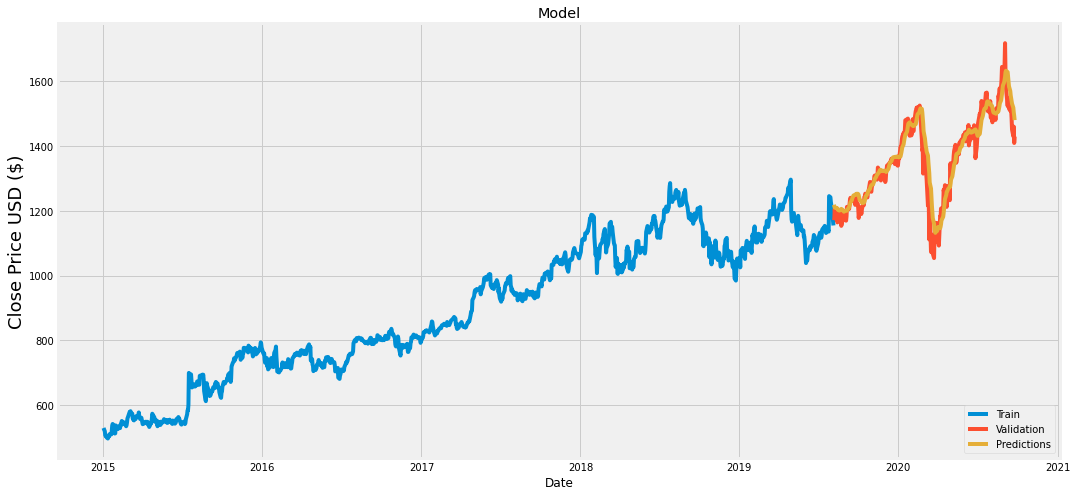

In [23]:
#data vizualisation
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [24]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-08-06,1171.079956,1218.508423
2019-08-07,1175.910034,1213.934570
2019-08-08,1206.189941,1209.692017
2019-08-09,1188.900024,1209.331421
2019-08-12,1174.500000,1208.901245
...,...,...
2020-09-18,1451.089966,1530.638306
2020-09-21,1430.140015,1518.227051
2020-09-22,1459.819946,1503.672485


In [25]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2018-09-03')
# new dataframe creation
new_df = apple_quote.filter(['Close'])
#getting the last 60 days closing price values & conversion df to np array
last_60_days = new_df[-60:].values

#data scaling between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#empty list creation
X_test = []
#append the 60 past days
X_test.append(last_60_days_scaled)
#convert to np array
X_test = np.array(X_test)
#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get predicted scaled price
pred_price = model.predict(X_test)
#unscaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[17.93643]]


In [26]:
apple_quote2 = web.DataReader('GOOGL', data_source='yahoo', start='2019-09-03', end=end)
print(apple_quote2['Close'])

Date
2019-09-03    1169.550049
2019-09-04    1182.270020
2019-09-05    1212.189941
2019-09-06    1206.319946
2019-09-09    1205.270020
                 ...     
2020-09-18    1451.089966
2020-09-21    1430.140015
2020-09-22    1459.819946
2020-09-23    1409.390015
2020-09-24    1429.469971
Name: Close, Length: 269, dtype: float64


In [27]:
last_day = new_df[-1:].values
last_day

array([[56.90750122]])

In [28]:
diif = last_day - pred_price
print(diif)

[[38.97107124]]


In [29]:
if diif < 0: #hausse
    print("i advise you to buy")
elif diif > 0: #baisse
    print("i advise you to sell")

i advise you to sell


https://towardsdatascience.com/algorithmic-trading-based-on-technical-analysis-in-python-80d445dc6943

https://github.com/erykml/medium_articles/blob/master/Quantitative%20Finance/technical_analysis_strategies.ipynb

In [30]:
#fixing a threshold





#variables initialization
buys = []
sells = []
thresh = 0.1

start = 0
end = -1





#copy of lists creation? nope?



In [31]:

x = -1
for ohlcv, ind in zip(ohlcv_test[start: end], tech_ind_test[start: end]):
    normalised_price_today = ohlcv[-1][0]
    normalised_price_today = np.array([[normalised_price_today]])
    price_today = y_normaliser.inverse_transform(normalised_price_today)
    predicted_price_tomorrow = np.squeeze(y_normaliser.inverse_transform(model.predict([[ohlcv], [ind]])))
    delta = predicted_price_tomorrow - price_today
    if delta > thresh:
        buys.append((x, price_today[0][0]))
    elif delta < -thresh:
        sells.append((x, price_today[0][0]))
    x += 1
print(f"buys: {len(buys)}")
print(f"sells: {len(sells)}")

NameError: name 'ohlcv_test' is not defined

In [32]:
import pickle5

In [33]:
#from zipline.api import order_target, record, symbol, set_commission, order_percent

In [34]:
#from zipline.finance import commission

In [35]:
# save model and architecture to single file
model.save("GOOGL_model.h5")

In [36]:
!ls

adding_MSFT_AMZN_NFLX_GOOGL_FB.ipynb
build_model_on__AAPL.ipynb
build_model_on_AAPL.ipynb
build_model_on_AAPL__merged_cells_4_1st_script.ipynb
build_model_on_GOOGL.ipynb
build_model_on_MSFT.ipynb
GOOGL_model.h5
to_solve_installation_conflicts.ipynb


In [ ]:
!rm model.h5

In [ ]:
!ls

In [ ]:
#conda install -c conda-forge jupyterthemes
#!pip3 install jupyterthemes
!pip3 install jupyterthemes==0.16.1

In [ ]:
!jt -l #list of themes

In [ ]:
!jt -r
#!jt -t onedork  # + refresh the notebook # to switch into dark theme
#changing the font:
#!jt -t solarizedd -f fira -fs 115
#adjusting cell width:
#!jt -t chesterish -cellw 90% -lineh 170
#cursor width and colour:
#!jt -t oceans16 -cursc r -cursw 5
#!jt -r  # + refresh the notebook #to restore back

In [ ]:
!jt -t solarized

In [ ]:
#changing the font:
#!jt -t solarizedd -f fira -fs 115

In [ ]:
#adjusting cell width:
#!jt -t chesterish -cellw 90% -lineh 170

In [ ]:
#cursor width and colour:
#!jt -t oceans16 -cursc r -cursw 5

Plotting With The Theme

The jupyterthemes library also allows you to make appealing visualisation with its submodule jtplot. Import the module and use its style() method to change figure properties.

`#import the module
from jupyterthemes import jtplot`

the style() method can be used to beautify your visualisation

In [ ]:
# another method with import

#from jupyterthemes import get_themes
#from jupyterthemes.styles import set_rb_theme
